# Midterm Examination - Programming Part

### Name: Chutipon Vimonkanjana

### Student id: 610610578

(double click to edit your information)

## Instructions:

You will perform **DWT and Quantization experiments** on [**lenagray.tif**](https://o365cmu-my.sharepoint.com/:i:/g/personal/dome_potikanond_cmu_ac_th/EUUmlUYQDOtHg6OUmBqNb_4BC7v1HSF-HzEjr_PgVOPwmQ?e=KibrKO) image. 

- Apply wavelet decomposition with the **db1** or **bior4.4** filters. 
- You have to perform **at least 3 levels of wavelet decomposition**, which results in multiple subbands of coefficients (e.g. LL, LH, HL, HH, ...) depending on the number of decomposition levels. 
- You can quantize (or thresholding) by *setting some or all detail subbands coefficients* to **ZERO**.
- Next step is to apply wavelet reconstruction to get your (approximated) data back. 
- You can compare the reconstructed image with the original version by ploting them side-by-side and calculate its PSNR. 

You have to repeat the process with different set of quantized coefficient subbands to show different levels of scalability

You can use [PyWavelets](https://pywavelets.readthedocs.io/en/latest/index.html) library to do the job. API reference can be found here.

**The report should explain ...**
- How do you do the experimentation step-by-step along with the code and results? 
- Compare the decoded images getting from different quantization paremeters along with PSNR.
- Discussion - analyze and conclude the experiment.

**You are NOT allowed to use other libraries except those that are mentioned in the class.**

***************กรุณา run code ทุก cell ใหม่ก่อนตรวจด้วยครับ เพื่อความถูกต้องของ code******************

In [14]:
from math import log10, sqrt
import cv2
import numpy as np
import pywt as pwt
import matplotlib.pyplot as plt
%matplotlib inline

Import Image
Check Size

In [15]:
img = cv2.imread('lenagray.tif',0)
print(img)
print(img.shape)

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]
(512, 512)


ทํา DWT ทั้ง 3level

In [26]:
img_dwt_L1 = pwt.wavedec2(img,'db1',level=1)
img_dwt_L2 = pwt.wavedec2(img,'db1',level=2)
img_dwt_L3 = pwt.wavedec2(img,'db1',level=3)

เก็บค่า multiple subbands (LV3) of coefficients ไว้ใน LL2,(LH2,HL2,HH2),(LH1,HL1,HH1),(LH,HL,HH)

In [17]:
LL2,(LH2,HL2,HH2),(LH1,HL1,HH1),(LH,HL,HH) = img_dwt_L3
print()

plot ค่า image, LL, LL1, LL2 ของเเต่ล่ะ subbands

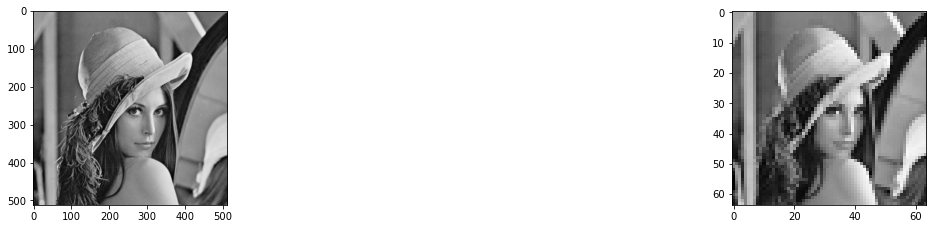

In [18]:
plt.figure(figsize=(16,16))
plt.subplot(1,4,1); plt.imshow(img,'gray')
plt.subplot(1,4,4); plt.imshow(LL2,'gray')
plt.show()

Check array 

In [19]:
print(HH)
print(HH[0])
print(HH[0][0])

[[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.  -1.   1.5 ... -2.5 -7.   0.5]
 ...
 [ 0.   2.   0.  ...  1.5  5.  -5.5]
 [ 0.  -1.5 -2.  ...  0.5  1.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Quantize by setting all detail subbands coefficients(LH,HL,HH) to ZERO

ใช้ for loop set ค่าใน subbands(LH,HL,HH) ให้เป็น 0

เเสดงข้อมูลของภาพที่ผ่านการ Quantize subbands(LH,HL,HH)

ทํา Wavelet Reconstruction ของภาพที่ Quantize subbands(LH,HL,HH) เเลัว plotเทียบกับภาพต้นฉบับ

(array([[1283.5  , 1270.125, 1246.875, ...,  997.75 ,  962.25 , 1086.875],
       [1251.75 , 1252.625, 1246.5  , ..., 1029.5  ,  779.875,  401.875],
       [1246.25 , 1256.625, 1253.375, ...,  742.   ,  389.875,  388.875],
       ...,
       [ 546.875,  848.125, 1353.375, ...,  811.375,  540.75 ,  484.625],
       [ 447.625,  655.875, 1439.625, ...,  663.25 ,  468.25 ,  446.25 ],
       [ 403.125,  552.375, 1534.125, ...,  443.625,  463.25 ,  698.75 ]]), (array([[  6.5  ,  10.875,   9.125, ...,  -3.75 , -15.25 , 176.125],
       [ -4.25 ,   3.375,  -1.75 , ...,  -9.5  , 142.875,  17.625],
       [  0.75 ,  -3.125,  -2.375, ..., 159.   ,  -6.625,  -6.125],
       ...,
       [ 62.875,  43.125,  16.125, ...,  12.625,  16.   ,  30.125],
       [ 19.625,  45.125, -69.125, ...,  53.5  ,  11.25 , -22.75 ],
       [ 10.875,  33.875,  12.875, ...,  42.125, -18.25 , -75.   ]]), array([[   3.25 ,   17.625,   11.875, ...,    4.   ,  -12.25 ,   68.125],
       [   4.5  ,    4.875,    2.5  , ...,  

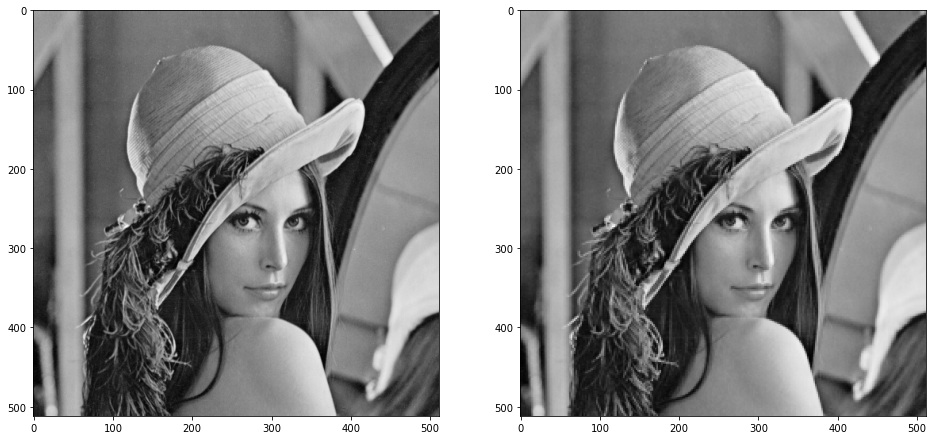

In [20]:
LL2,(LH2,HL2,HH2),(LH1,HL1,HH1),(LH,HL,HH) = img_dwt_L3


for i in range(0,len(HH)):
    for j in HH[i]:
     HH[i]=0



for i in range(0,len(HL)):
    for j in HL[i]:
     HL[i]=0



for i in range(0,len(LH)):
    for j in LH[i]:
     LH[i]=0



img_dwt_L3Q1 = LL2,(LH2,HL2,HH2),(LH1,HL1,HH1),(LH,HL,HH)


print(img_dwt_L3Q1)


img_idwt1 = pwt.waverec2(img_dwt_L3Q1,'db1')


plt.figure(figsize=(16,16))
plt.subplot(1,2,1); plt.imshow(img,'gray')
plt.subplot(1,2,2); plt.imshow(img_idwt1,'gray')
plt.show()
        

Quantize by setting all detail subbands coefficients(LH1,HL1,HH1),(LH,HL,HH) to ZERO

ใช้ for loop set ค่าใน subbands(LH1,HL1,HH1),(LH,HL,HH) ให้เป็น 0

เเสดงข้อมูลของภาพที่ผ่านการ Quantize subbands(LH1,HL1,HH1),(LH,HL,HH)

ทํา Wavelet Reconstruction ของภาพที่ Quantize subbands(LH1,HL1,HH1),(LH,HL,HH) เเลัว plotเทียบกับภาพต้นฉบับ

[array([[1283.5  , 1270.125, 1246.875, ...,  997.75 ,  962.25 , 1086.875],
       [1251.75 , 1252.625, 1246.5  , ..., 1029.5  ,  779.875,  401.875],
       [1246.25 , 1256.625, 1253.375, ...,  742.   ,  389.875,  388.875],
       ...,
       [ 546.875,  848.125, 1353.375, ...,  811.375,  540.75 ,  484.625],
       [ 447.625,  655.875, 1439.625, ...,  663.25 ,  468.25 ,  446.25 ],
       [ 403.125,  552.375, 1534.125, ...,  443.625,  463.25 ,  698.75 ]]), (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0.

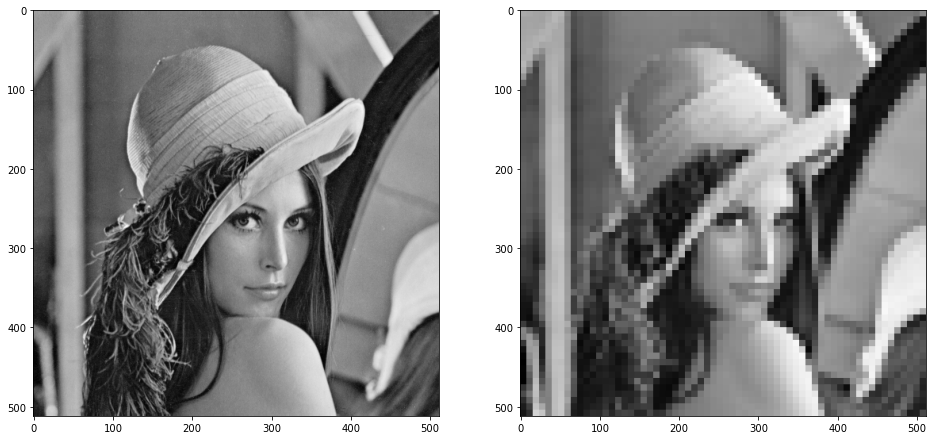

In [24]:
LL2,(LH2,HL2,HH2),(LH1,HL1,HH1),(LH,HL,HH) = img_dwt_L3

print(img_dwt_L3)

for i in range(0,len(HH)):
    for j in HH[i]:
     HH[i]=0



for i in range(0,len(HL)):
    for j in HL[i]:
     HL[i]=0



for i in range(0,len(LH)):
    for j in LH[i]:
     LH[i]=0



for i in range(0,len(HH1)):
    for j in HH1[i]:
     HH1[i]=0



for i in range(0,len(HL1)):
    for j in HL1[i]:
     HL1[i]=0



for i in range(0,len(LH1)):
    for j in LH1[i]:
     LH1[i]=0



img_dwt_L3Q2 = LL2,(LH2,HL2,HH2),(LH1,HL1,HH1),(LH,HL,HH)

print(img_dwt_L3Q2)

img_idwt2 = pwt.waverec2(img_dwt_L3Q2,'db1')

plt.figure(figsize=(16,16))
plt.subplot(1,2,1); plt.imshow(img,'gray')
plt.subplot(1,2,2); plt.imshow(img_idwt2,'gray')

plt.show()

Quantize by setting all detail subbands coefficients(LH2,HL2,HH2),(LH1,HL1,HH1),(LH,HL,HH) to ZERO

ใช้ for loop set ค่าใน subbands(LH2,HL2,HH2),(LH1,HL1,HH1),(LH,HL,HH) ให้เป็น 0

เเสดงข้อมูลของภาพที่ผ่านการ Quantize subbands(LH2,HL2,HH2),(LH1,HL1,HH1),(LH,HL,HH)

ทํา Wavelet Reconstruction ของภาพที่ Quantize subbands(LH2,HL2,HH2),(LH1,HL1,HH1),(LH,HL,HH) เเลัว plotเทียบกับภาพต้นฉบับ

[array([[1283.5  , 1270.125, 1246.875, ...,  997.75 ,  962.25 , 1086.875],
       [1251.75 , 1252.625, 1246.5  , ..., 1029.5  ,  779.875,  401.875],
       [1246.25 , 1256.625, 1253.375, ...,  742.   ,  389.875,  388.875],
       ...,
       [ 546.875,  848.125, 1353.375, ...,  811.375,  540.75 ,  484.625],
       [ 447.625,  655.875, 1439.625, ...,  663.25 ,  468.25 ,  446.25 ],
       [ 403.125,  552.375, 1534.125, ...,  443.625,  463.25 ,  698.75 ]]), (array([[  6.5  ,  10.875,   9.125, ...,  -3.75 , -15.25 , 176.125],
       [ -4.25 ,   3.375,  -1.75 , ...,  -9.5  , 142.875,  17.625],
       [  0.75 ,  -3.125,  -2.375, ..., 159.   ,  -6.625,  -6.125],
       ...,
       [ 62.875,  43.125,  16.125, ...,  12.625,  16.   ,  30.125],
       [ 19.625,  45.125, -69.125, ...,  53.5  ,  11.25 , -22.75 ],
       [ 10.875,  33.875,  12.875, ...,  42.125, -18.25 , -75.   ]]), array([[   3.25 ,   17.625,   11.875, ...,    4.   ,  -12.25 ,   68.125],
       [   4.5  ,    4.875,    2.5  , ...,  

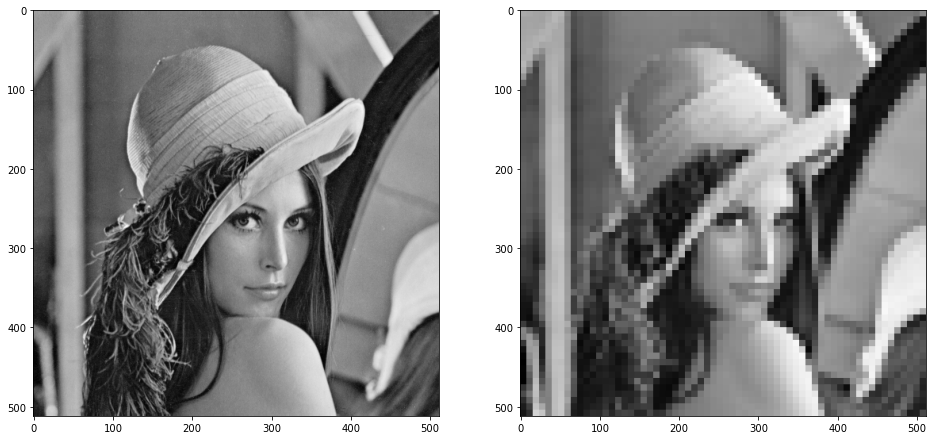

In [23]:


print(img_dwt_L3)
for i in range(0,len(HH)):
    for j in HH[i]:
     HH[i]=0



for i in range(0,len(HL)):
    for j in HL[i]:
     HL[i]=0



for i in range(0,len(LH)):
    for j in LH[i]:
     LH[i]=0



for i in range(0,len(HH1)):
    for j in HH1[i]:
     HH1[i]=0



for i in range(0,len(HL1)):
    for j in HL1[i]:
     HL1[i]=0



for i in range(0,len(LH1)):
    for j in LH1[i]:
     LH1[i]=0


for i in range(0,len(HH2)):
    for j in HH2[i]:
     HH2[i]=0


for i in range(0,len(HL2)):
    for j in HL2[i]:
     HL2[i]=0


for i in range(0,len(LH2)):
    for j in LH2[i]:
     LH2[i]=0

img_dwt_L3Q3 = LL2,(LH2,HL2,HH2),(LH1,HL1,HH1),(LH,HL,HH)

print(img_dwt_L3Q3)

img_idwt3 = pwt.waverec2(img_dwt_L3Q3,'db1')

plt.figure(figsize=(16,16))
plt.subplot(1,2,1); plt.imshow(img,'gray')
plt.subplot(1,2,2); plt.imshow(img_idwt3,'gray')

plt.show()

*****Quantize subbands นี้ บัคครับ งงเลย ขอความกรุณา อาจารย์ด้วครับ*****

***************กรุณา run code ทุก cell ใหม่ก่อนตรวจด้วยครับ เพื่อความถูกต้องของ code******************